In [1]:
from transformers import pipeline

import os
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

2024-05-02 09:46:05.405778: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 09:46:05.410228: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 09:46:05.461410: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 09:46:06.250416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
filename = os.path.join("..","out", "labels.csv")
data = pd.read_csv(filename)

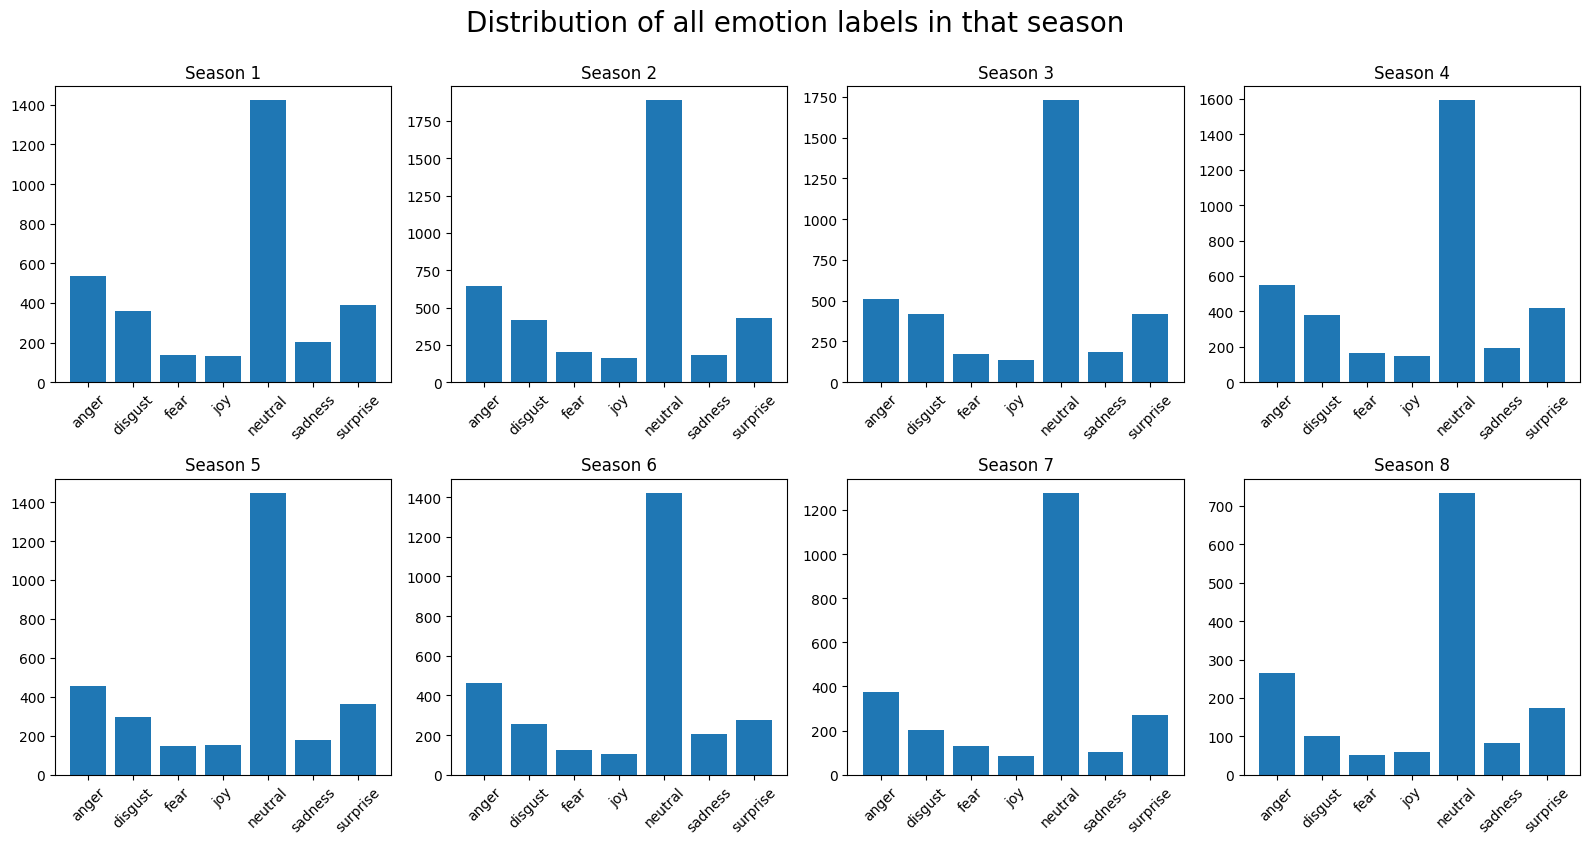

In [9]:
unique_seasons = data['Season'].unique()
unique_labels = data['labels'].unique()

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

for idx, season in enumerate(unique_seasons):
    season_data = data[data['Season'] == season]
    label_counts = season_data['labels'].value_counts().sort_index()
    axs[idx].bar(label_counts.index, label_counts.values)
    axs[idx].tick_params(axis='x', which='major', rotation=45)
    axs[idx].set_title(season)

plt.tight_layout()
fig.suptitle("Distribution of all emotion labels in that season", fontsize = 20, y=1.05)
plt.show()

In [10]:
unique_seasons

array(['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5',
       'Season 6', 'Season 7', 'Season 8'], dtype=object)

In [8]:
data

,Unnamed: 0,Season,labels
0,0,Season 1,disgust
1,1,Season 1,disgust
2,2,Season 1,surprise
3,3,Season 1,neutral
4,4,Season 1,fear
...,...,...,...
23902,23906,Season 8,neutral
23903,23907,Season 8,disgust
23904,23908,Season 8,disgust
23905,23909,Season 8,surprise


In [14]:
count1 = (data["Season"] == "Season 1").sum()

In [12]:
count1

3179

In [17]:
season1_data = data[data["Season"] == "Season 1"]

In [18]:
count2 = (season1_data["labels"] == "disgust").sum()

In [19]:
count2

360

In [21]:
count2/count1*100

11.324315822585719

In [22]:
season_sum = count1 = (data["Season"] == "Season 1").sum()
season1_data = data[data["Season"] == "Season 1"]
label_sum = (season1_data["labels"] == "disgust").sum()
label_sum/season_sum*100

11.324315822585719

In [29]:
unique_seasons

array(['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5',
       'Season 6', 'Season 7', 'Season 8'], dtype=object)

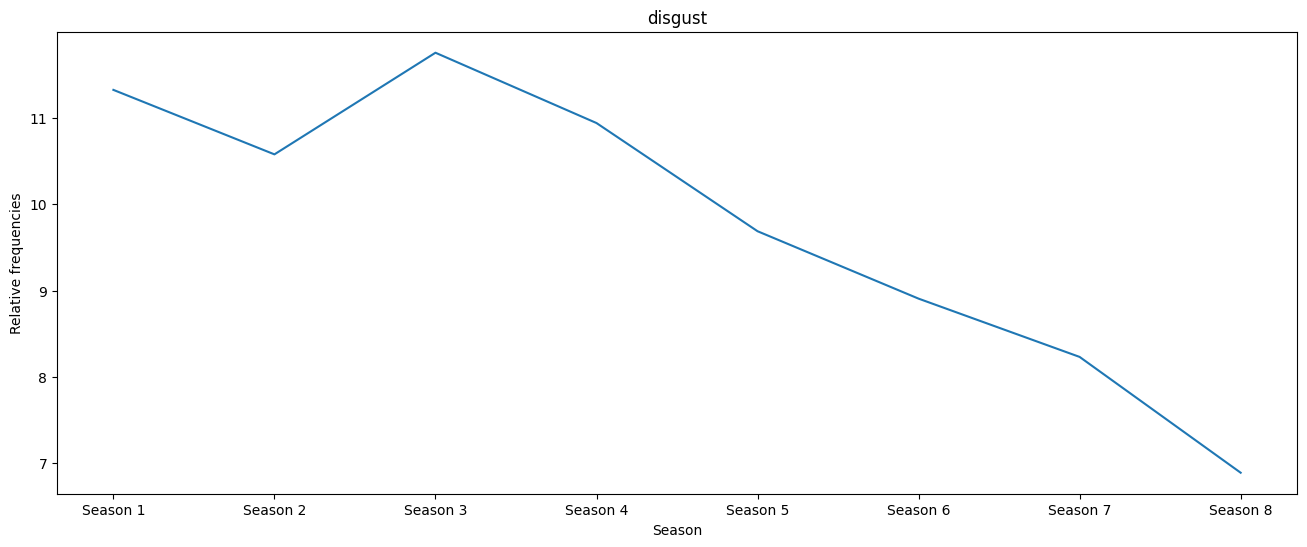

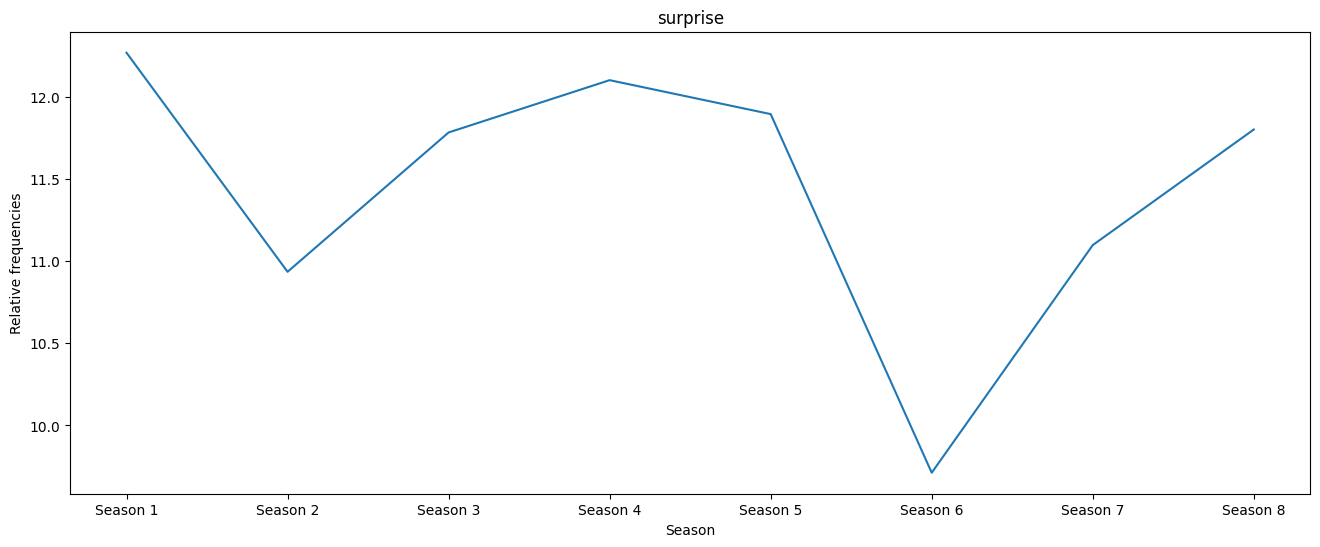

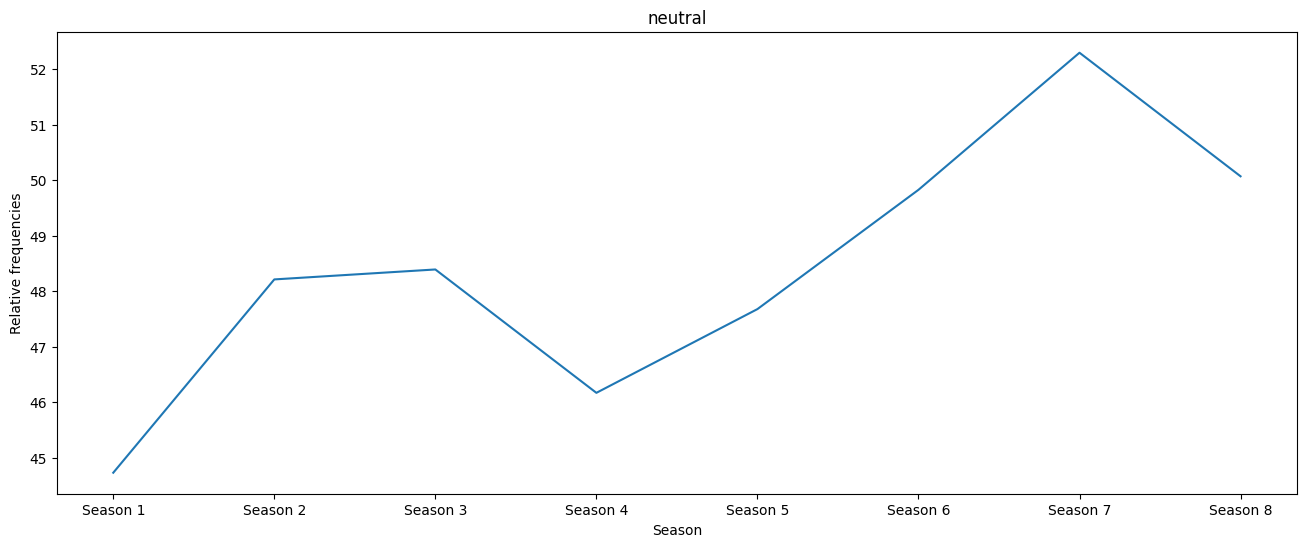

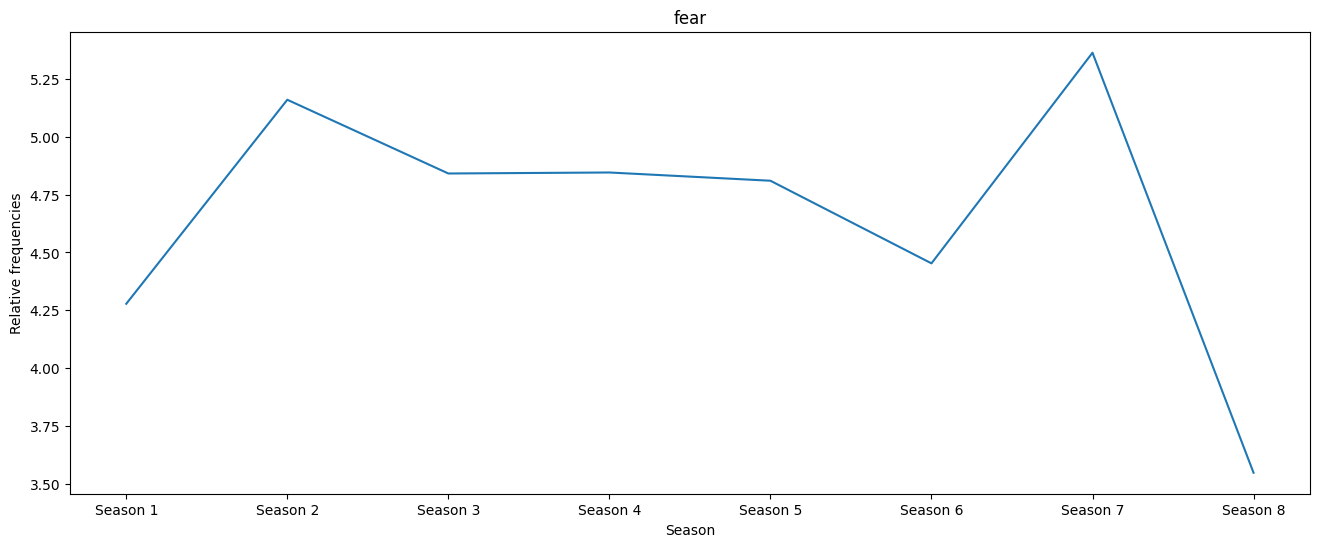

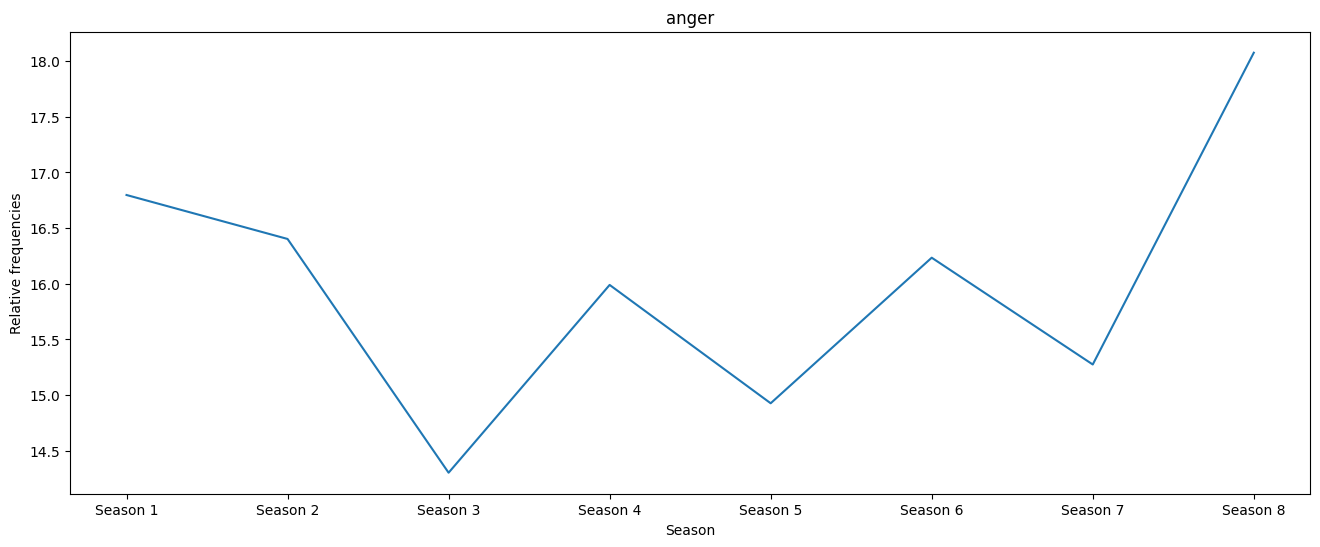

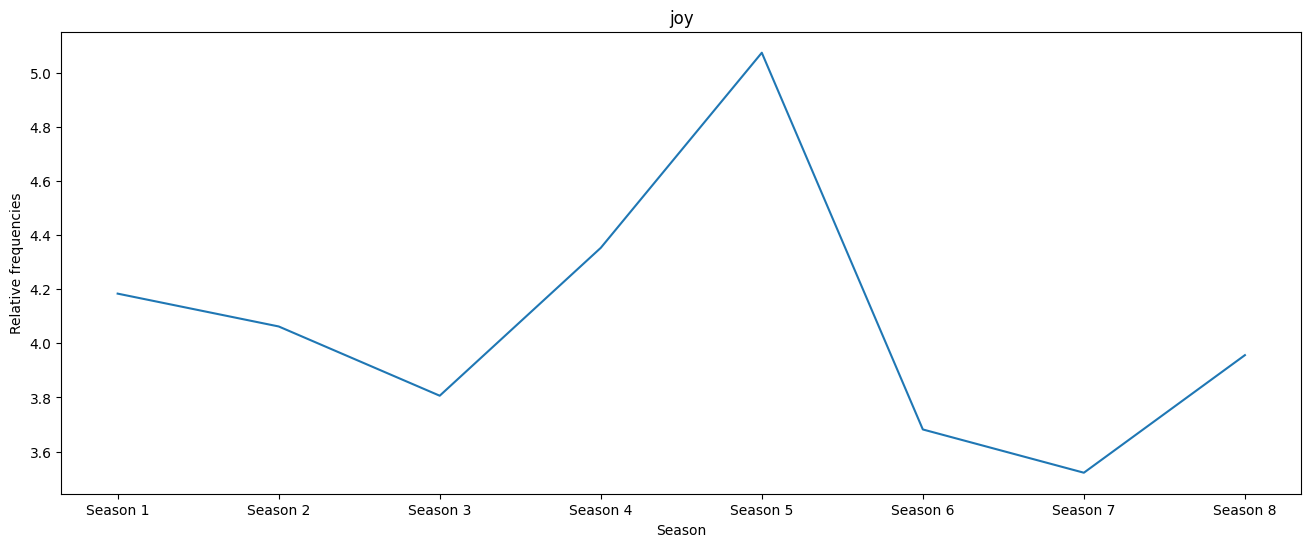

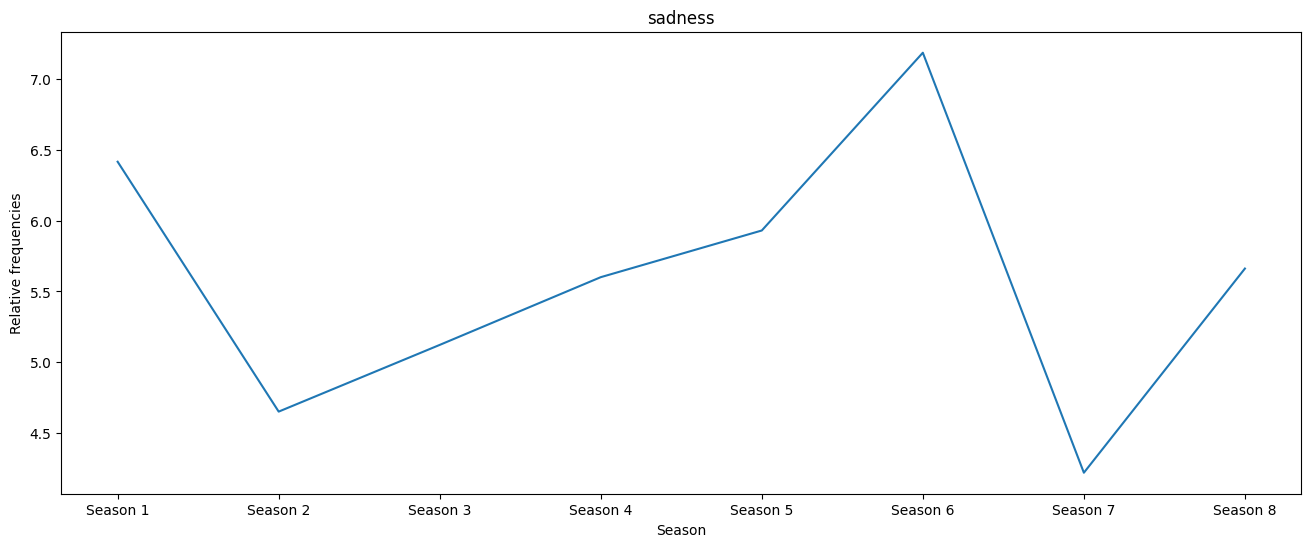

In [65]:
unique_seasons = data['Season'].unique()
unique_labels = data['labels'].unique()

for label in unique_labels:
  relative_freq_list = []
  for season in unique_seasons:
    label_data = data[(data["labels"] == label)&(data["Season"] == season)]
    relative_freq = len(label_data)/len(data[data["Season"]== season])*100
    relative_freq_list.append(relative_freq)

  plt.figure(figsize=(16,6))
  plt.plot(unique_seasons, relative_freq_list)
  plt.title(label)
  plt.xlabel("Season")
  plt.ylabel("Relative frequencies")

  plt.savefig("../out/" + label + ".png")

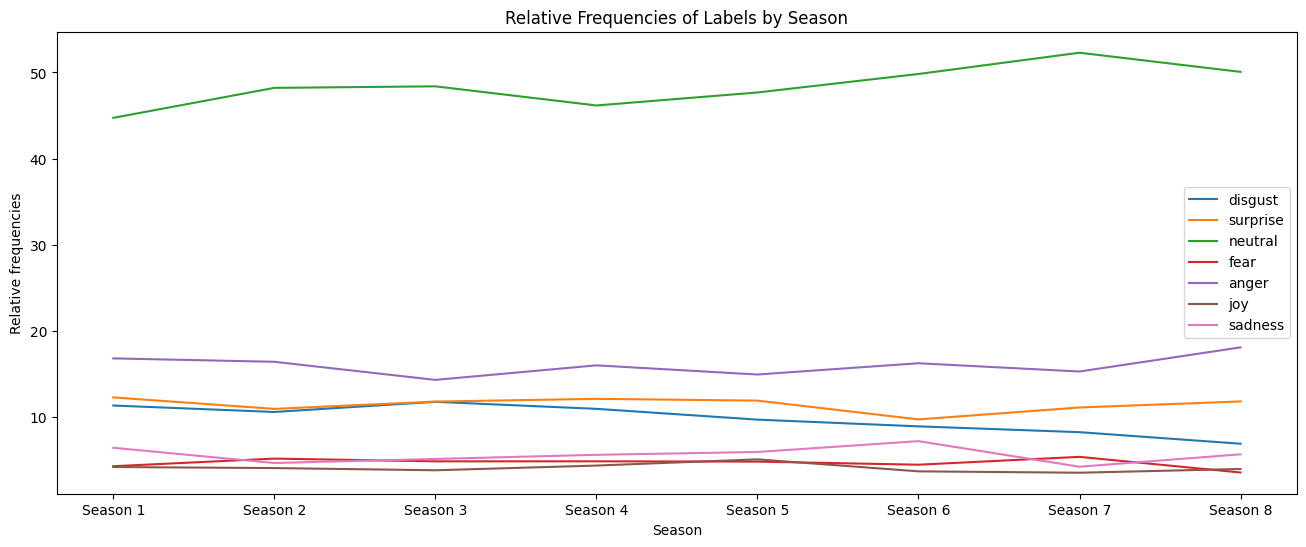

In [66]:
unique_seasons = data['Season'].unique()
unique_labels = data['labels'].unique()

plt.figure(figsize=(16,6))

for label in unique_labels:
  relative_freq_list = []
  for season in unique_seasons:
    label_data = data[(data["labels"] == label)&(data["Season"] == season)]
    relative_freq = len(label_data)/len(data[data["Season"]== season])*100
    relative_freq_list.append(relative_freq)

  plt.plot(unique_seasons, relative_freq_list, label=label)

plt.title("Relative Frequencies of Labels by Season")
plt.xlabel("Season")
plt.ylabel("Relative frequencies")
plt.legend()

plt.savefig("../out/relative_frequencies.png")

In [64]:
relative_freq_list

[6.417112299465241,
 4.649974450689831,
 5.121746431570109,
 5.600696459663378,
 5.930807248764415,
 7.187938288920057,
 4.217854217854218,
 5.661664392905866]

In [33]:
season = data.groupby(["Season", "labels"])["labels"].count()

In [36]:
season["Season 1"]["anger"]

534

In [43]:
season_groups = data.groupby('Season')

In [48]:
season_groups

In [44]:
season_counts = season_groups.size()

In [47]:
season_counts

Season
Season 1    3179
Season 2    3914
Season 3    3573
Season 4    3446
Season 5    3035
Season 6    2852
Season 7    2442
Season 8    1466
dtype: int64

In [50]:
# Calculate relative frequency for each label within its season
#relative_freq = season_groups['labels'].transform('size') / season_counts * 100

#Alternatively, use agg with a custom function
def calculate_relative_freq(group):
     return group['labels'].size() / len(group) * 100

relative_freq = season_groups.agg(calculate_relative_freq)

KeyError: 'labels'

In [46]:
relative_freq

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
            ..
Season 4   NaN
Season 5   NaN
Season 6   NaN
Season 7   NaN
Season 8   NaN
Length: 23915, dtype: float64